In [1]:
library(readr)
library(fpp3)
#library(ggplot2)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── fpp3 0.4.0 ──



✔ tibble      3.1.0      ✔ tsibble     1.0.0 
✔ dplyr       1.0.5      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.1.7 
✔ lubridate   1.7.10     ✔ fable       0.3.0 
✔ ggplot2     3.3.3      



── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [2]:
datos <- read.csv("../data/log-imae.csv", stringsAsFactors=FALSE) %>%
  mutate(mes = yearmonth(seq(as.Date("1991-01-01"), as.Date("2019-12-01"), by = "1 month"))) %>%
  as_tsibble(index=`mes`) %>%
  select(mes, Original, Tendencia.ciclo)

Plot variable not specified, automatically selected `.vars = value`



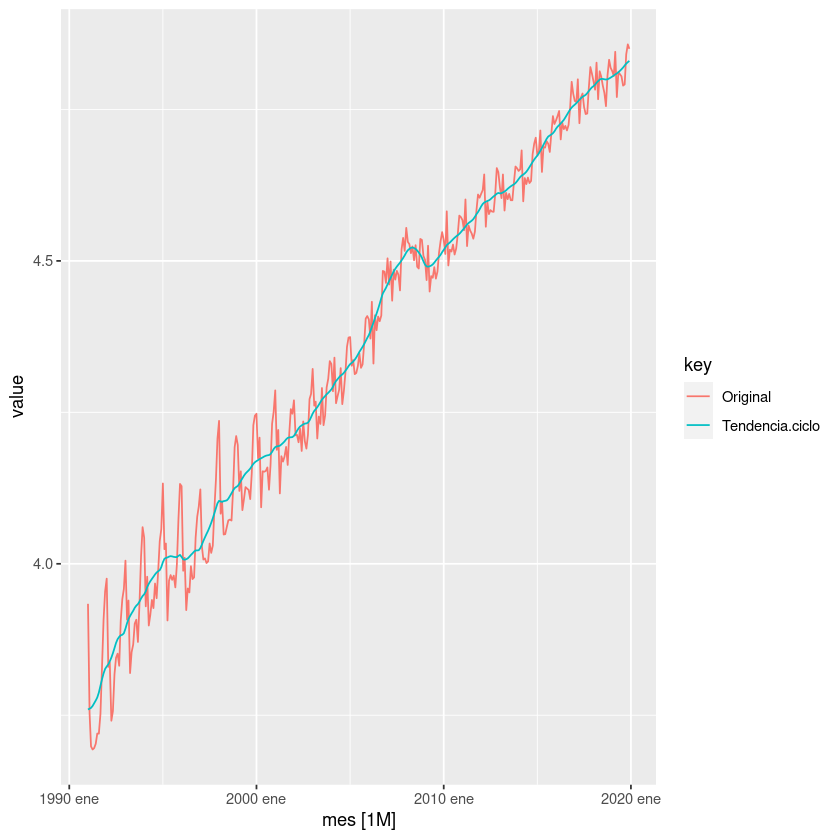

In [3]:
datos %>% gather() %>% autoplot()

In [4]:
datos %>% ACF(Original) %>% autoplot() + xlab(" ") -> fig1a
datos %>% ACF(Tendencia.ciclo) %>% autoplot() + xlab(" ") -> fig1b
datos %>% mutate(temp = difference(Original)) %>% ACF(temp) %>% autoplot() + xlab(" ") -> fig2a
datos %>% mutate(temp = difference(Tendencia.ciclo)) %>% ACF(temp) %>% autoplot() + xlab(" ") -> fig2b

datos %>% mutate(temp = difference(Original, lag=12)) %>% ACF(temp) %>% autoplot() + xlab(" ") -> fig3a
datos %>% mutate(temp = difference(Tendencia.ciclo, lag=12)) %>% ACF(temp) %>% autoplot() + xlab(" ") -> fig3b

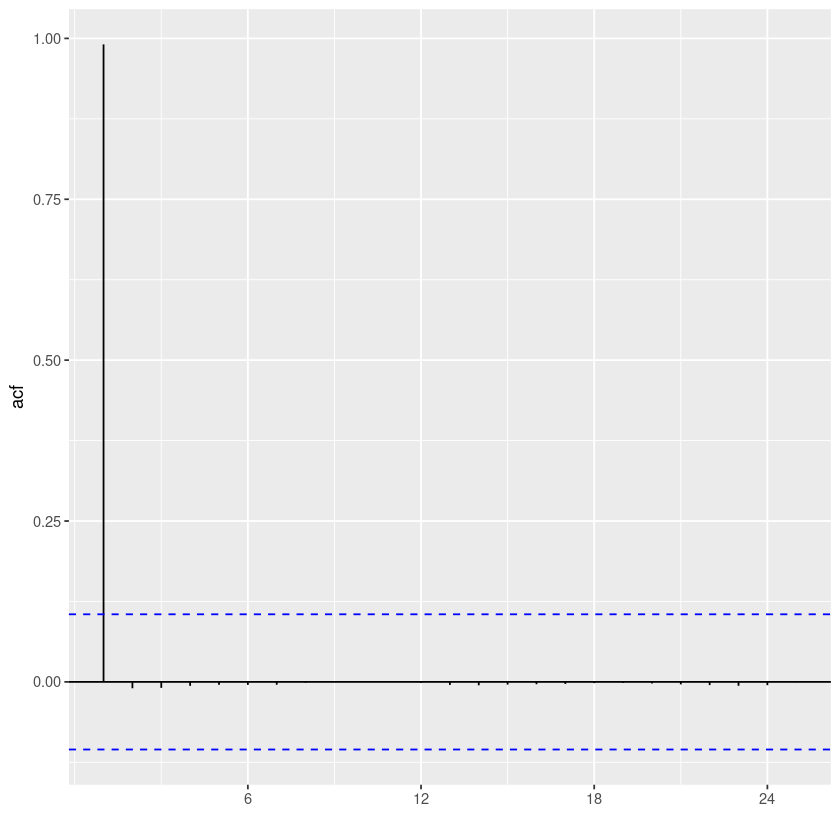

In [5]:
datos %>% ACF(Original, type="partial") %>% autoplot() + xlab(" ") -> figP1a
datos %>% ACF(Tendencia.ciclo, type="partial") %>% autoplot() + xlab(" ")

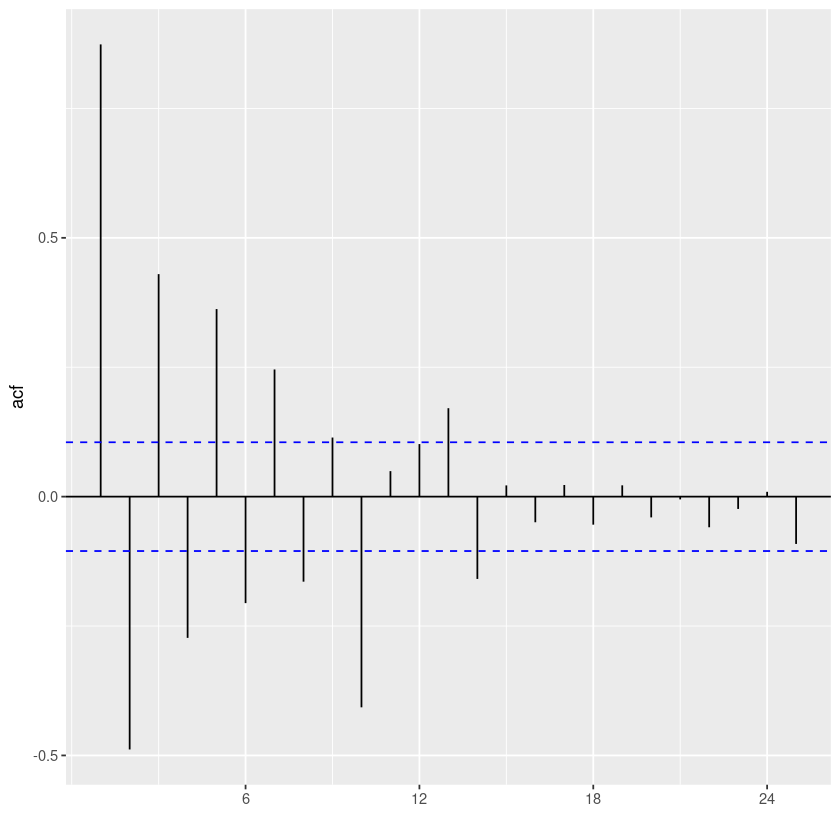

In [6]:
datos %>% mutate(temp = difference(Original)) %>% ACF(temp, type="partial") %>% autoplot() + xlab(" ") -> figP2a
datos %>% mutate(temp = difference(Tendencia.ciclo)) %>% ACF(temp, type="partial") %>% autoplot() + xlab(" ")

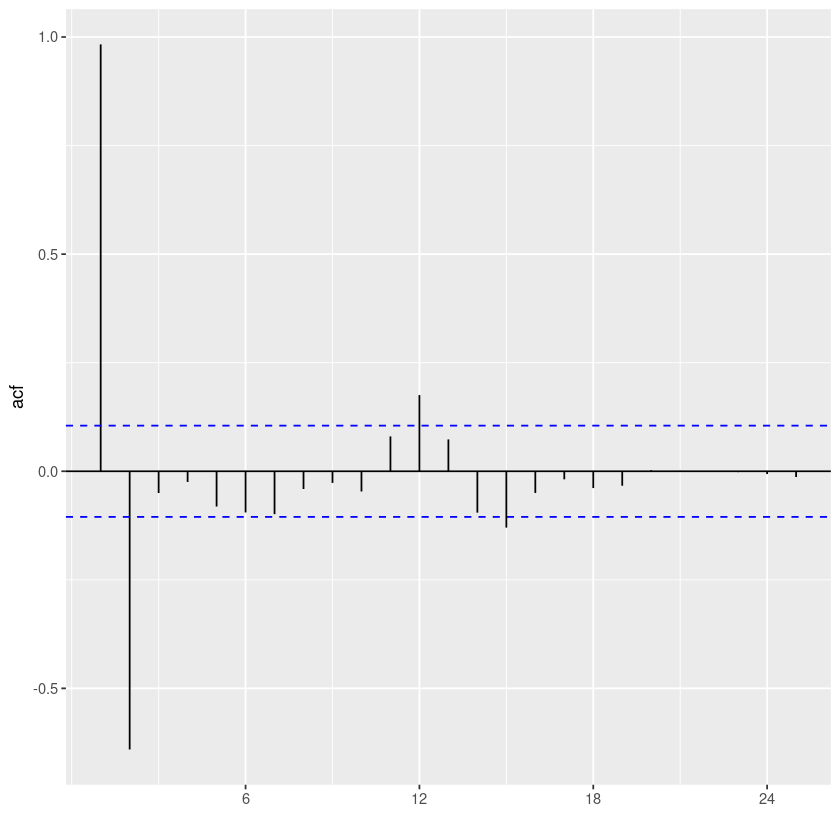

In [7]:
datos %>% mutate(temp = difference(Original, lag=12)) %>% ACF(temp, type="partial") %>% autoplot() + xlab(" ") -> figP3a
datos %>% mutate(temp = difference(Tendencia.ciclo, lag=12)) %>% ACF(temp, type="partial") %>% autoplot() + xlab(" ")